#Customer Churn - AI

- In simple terms that customer has stopped doing bussiness with company
- common problem when it comes to telocome indursty
- using AI model for Analysis
- using Keras library for model building

### Tasks going to be performed
- Data extraction and Loading
- Data Manipulation
- Data Visulization
- Model Building
- Model Evaluation

In [ ]:
# importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Have dataset in zip file so have to unzip dataset file
from zipfile import ZipFile
file_path = '/content/Customer-Churn-1.zip'

# file extracting
with ZipFile(file_path, 'r') as zip_ref:
  zip_ref.extractall('/content/')
  print('File Extraction Done!!!')

import os
os.listdir('/content/')    # listing extracted files

File Extraction Done!!!


['.config',
 'solution.pdf',
 'Customer-Churn-1.zip',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'Customer-Churn-Project-Description.pdf',
 'customer-churn-data dictionary.xlsx',
 'sample_data']

In [ ]:
# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Manipulation

In [ ]:
# finding total number of male customer
male_count = df[df['gender'] == 'Male'].shape[0]
print(f'Total number of male customer is {male_count}')


Total number of male customer is 3555


In [ ]:
# Finding total number of customers whose internet servise is 'DSL'
dsl_count = df[df['InternetService'] == 'DSL'].shape[0]
print(f'Total number of customers whose internet service is DSL is {dsl_count}')


Total number of customers whose internet service is DSL is 2421


In [ ]:
# Extract all Female senior citizens whose Payment Method is Mailed check & store in new_customer
new_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [ ]:
# Extract customers whose tenure < 10 OR TotalCharges < 500, store in new_customer

# Convert TotalCharges to numeric (some values may be blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


### Data Visualization

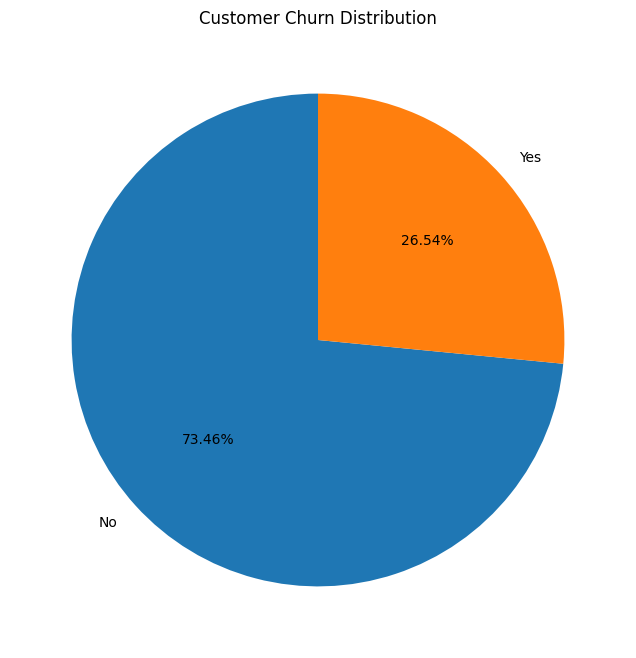

In [ ]:
# Pie chart to show customer would churn out

plt.figure(figsize=(8, 8))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Customer Churn Distribution')
plt.show()

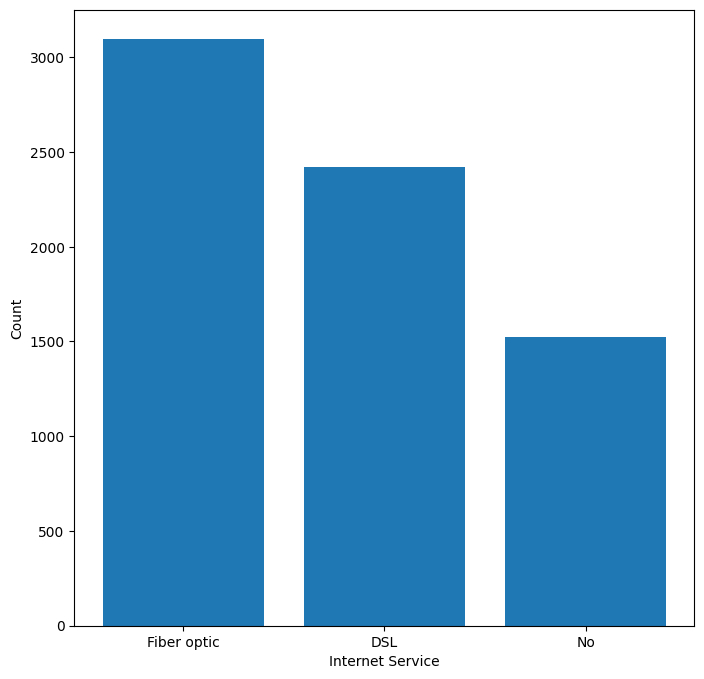

In [ ]:
# Bar plot to distribution of 'internet service'

plt.figure(figsize=(8, 8))
internet_counts = df['InternetService'].value_counts()
plt.bar(internet_counts.index, internet_counts.values)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

### Model Building
- have to build three different models using different features

1.   Basic Sequential (only tenure → Churn)
2.   Sequential Model with Dropout Layers
3.   Multi-Feature Model (tenure, MonthlyCharges, TotalCharges)



1. model-1  basic sequential model

In [ ]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])  # Yes=1, No=0

# Feature and Target
X = df[['tenure']]
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from re import VERBOSE
# model 1 simple siquential model building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

model = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compiling model 1
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# traning the model
history1 = model.fit(X_train, y_train, epochs=150, verbose = 0 , validation_split=0.2)


Epoch 1/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7289 - loss: 0.5414 - val_accuracy: 0.7471 - val_loss: 0.4968
Epoch 2/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7289 - loss: 0.5226 - val_accuracy: 0.7471 - val_loss: 0.4963
Epoch 3/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7283 - loss: 0.5196 - val_accuracy: 0.7471 - val_loss: 0.4955
Epoch 4/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.5265 - val_accuracy: 0.7471 - val_loss: 0.5010
Epoch 5/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7249 - loss: 0.5268 - val_accuracy: 0.7471 - val_loss: 0.4947
Epoch 6/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.5005 - val_accuracy: 0.7569 - val_loss: 0.5040
Epoch 7/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7286 - loss: 0.5302 - val_accuracy: 0.7471 - val_loss: 0.4959
Epoch 8/150
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7334 - loss: 0.5207 - val_acc

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy }')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7404 - loss: 0.5023
Test Loss: 0.49596357345581055, Test Accuracy: 0.7551454901695251


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


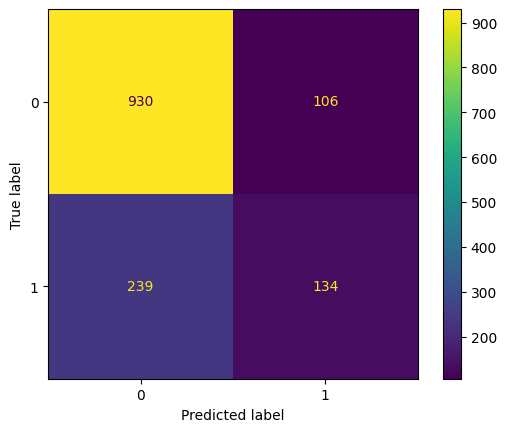

In [ ]:
# Model 1 predictions and Evalation
y_pred1 = (model.predict(X_test) > 0.5).astype('int32')
cm1 = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(cm1).plot()

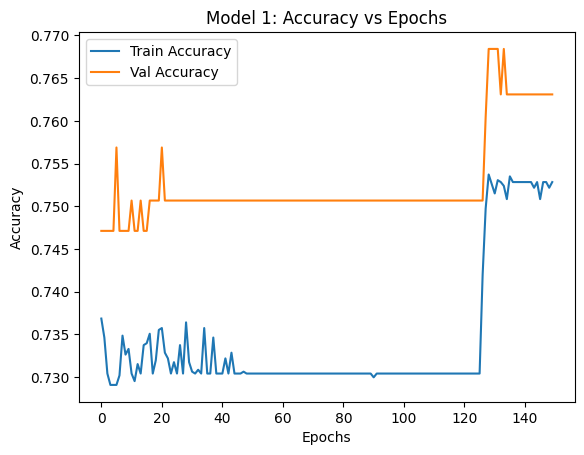

In [ ]:
# accuracy vs epoch
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 1: Accuracy vs Epochs')
plt.show()


2.  Model-2  Sequential Model with Dropout Layers

In [ ]:
from tensorflow.keras.layers import Dropout

# Model 2
model2 = Sequential([
    Dense(12, activation='relu', input_shape=(1,)),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit
history2 = model2.fit(X_train, y_train, epochs=150, verbose=0, validation_split=0.2)


In [ ]:
loss,accuracy= model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7253 - loss: 0.5289
Test Loss: 0.5227503776550293, Test Accuracy: 0.7352732419967651


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


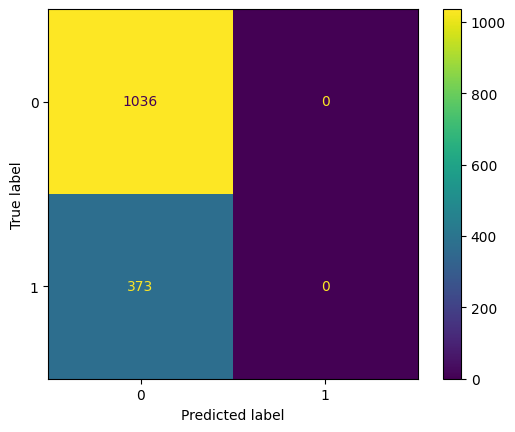

In [ ]:
# Predict & Confusion Matrix
y_pred2 = (model2.predict(X_test) > 0.5).astype('int32')
cm2 = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(cm2).plot()

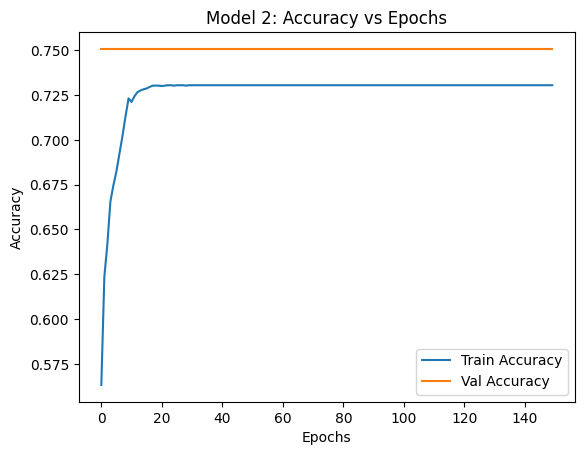

In [ ]:
# plotting accuracy vs epoch model-2
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 2: Accuracy vs Epochs')
plt.show()

3. Model-3  Multi-Feature Model (tenure, MonthlyCharges, TotalCharges)

In [ ]:
# Using this selected features
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Ensuring TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Droping rows with missing values in selected columns
df_model3 = df[features + ['Churn']].dropna()

# Features and target
X3 = df_model3[features].values
y3 = df_model3['Churn'].values

# Scaling the features values
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

# Train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.2, random_state=42)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


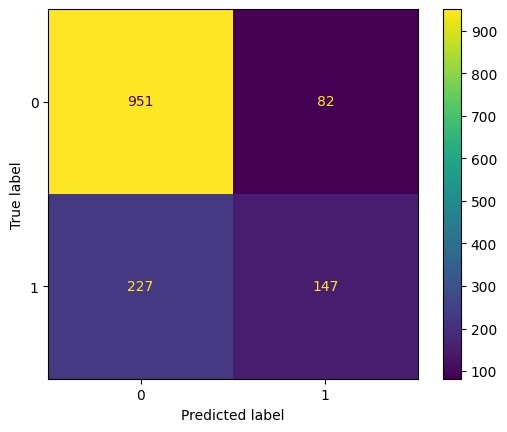

In [ ]:
# Model-3 building

model3 = Sequential([
    Dense(12, activation='relu', input_shape=(3,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit
history3 = model3.fit(X3_train, y3_train, epochs=150, verbose=0, validation_split=0.2)

# Predict & Confusion Matrix
y_pred3 = (model3.predict(X3_test) > 0.5).astype('int32')
cm3 = confusion_matrix(y3_test, y_pred3)
ConfusionMatrixDisplay(cm3).plot()


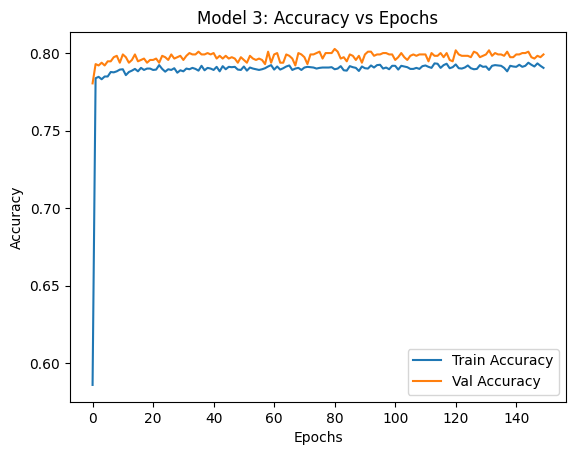

In [ ]:
# plotting accuracy vs epoch

plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model 3: Accuracy vs Epochs')
plt.show()

In [ ]:
import numpy as np
model1 = np.mean(history1.history['val_accuracy'])
model2 = np.mean(history2.history['val_accuracy'])
model3 = np.mean(history3.history['val_accuracy'])
print(f'Model 1 Validation Accuracy: {model1 * 100:.2f}%')
print(f'Model 2 Validation Accuracy: {model2 * 100:.2f}%')
print(f'Model 3 Validation Accuracy: {model3 * 100:.2f}%')

Model 1 Validation Accuracy: 75.25%
Model 2 Validation Accuracy: 75.07%
Model 3 Validation Accuracy: 79.76%
